## IMPORTANT NOTE: 
I am submittng this revamped version of the statistics assignment after the term has technically ended (as of writiing this message, it is 11PM on Friday, March 4, 2022). I was looking over my work after my last final today, and I noticed that my first submission of this assignment was a bit bare, so I decided
to rework it a bit :)

# Welcome! 

### Introduction: Statistics & Me

Since the beginning of the 2021-22 school year, I have been enrolled in AP Statistics Classes at Phillips Academy. Currently, we are dealing with inference (confidence intervals, hypotheses tests) in the class. One of the most frequently-mentioned themes in our class is __statistics versus parameters__; a statistic is some attribute of a sample, while a parameter is that same attribute for an entire population. 

You may be wondering: why is this concept of statistic vs. parameter so important? Well, the answer is as follows: Most people forget that statistics and parameters are different things! 

For this assignment, __I wish to visualize what people believe the difference between statistics and parameteres is__, if any. This will give me good exprience with both creating fake data and using bar graphs. 

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import *

# Section 1: Visualizing one Poll

## Importing the Data

In [3]:
data = pd.read_csv("stats_data.csv")
data 

,What is the Difference Between a Statistic and a Parameter?
0,Statistic is for Sample & Parameter is for Pop...
1,No difference
2,One Lives on Land and the Other in the Sea
3,Statistic is for Sample & Parameter is for Pop...
4,One Lives on Land and the Other in the Sea
...,...
995,No difference
996,Statistic is for Sample & Parameter is for Pop...
997,Statistic is for Sample & Parameter is for Pop...
998,One Lives on Land and the Other in the Sea


Organize the data a bit: how many responses for each choice? 

In [4]:
data["What is the Difference Between a Statistic and a Parameter?"].unique()

array(['Statistic is for Sample & Parameter is for Population',
       'No difference', 'One Lives on Land and the Other in the Sea'],
      dtype=object)

## Visualizing the Responses using a Bar Graph

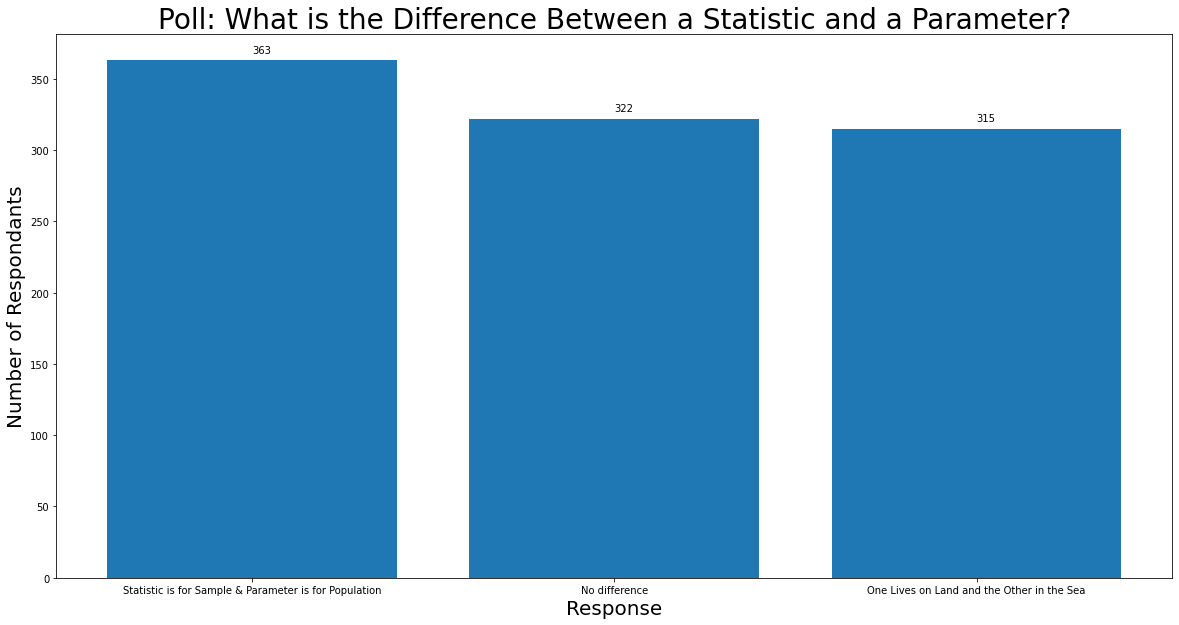

In [5]:
# plot
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Response", fontsize=20)
plt.ylabel(ylabel="Number of Respondants", fontsize=20)
plt.title(label="Poll: What is the Difference Between a Statistic and a Parameter?", fontsize=28)

plt.bar(x = data["What is the Difference Between a Statistic and a Parameter?"].unique(), 
        height=data.value_counts().values)

for resp in range(3):
    plt.text(x = data["What is the Difference Between a Statistic and a Parameter?"].unique()[resp],
             y = data.value_counts().values[resp] + 5,
             s = data.value_counts()[resp])

plt.show()

## Takeaways

A large portion, 363/1000 of the respondants in my dataset actually got the answer correct! 322 made the faulty assumption that there is no difference between a statistic and a parameter, and 315 made the silly assumption that a statistic lives on land while a parameter lives in the sea. 

# Section 2: Sampling Distributions & Inference (proportions)

One of my favorite things in statistics I learned about recently is the __sampling distribution__. A sampling distribution, in essence, describes what would happen with a population statistic if we sampled from the proportion a very large number of times. This is much more easily explained visually! 

In [6]:
# generate sampling distribution
# I learned how to do this using help from https://towardsdatascience.com/sampling-distributions-with-python-implementation-3f4555e1d450

# each sample will look something like this
np.random.choice(data["What is the Difference Between a Statistic and a Parameter?"].values, size=(1,10))[0]

array(['No difference', 'One Lives on Land and the Other in the Sea',
       'Statistic is for Sample & Parameter is for Population',
       'One Lives on Land and the Other in the Sea',
       'One Lives on Land and the Other in the Sea',
       'One Lives on Land and the Other in the Sea',
       'Statistic is for Sample & Parameter is for Population',
       'No difference', 'No difference', 'No difference'], dtype=object)

In [24]:
# repeat 1000 times to make sampling distribution
sampdist = []
for i in range(1000):
    sampdist.append(
        pd.Series(
        (
        np.random.choice(
                    data["What is the Difference Between a Statistic and a Parameter?"].values, 
                    size=(1,10))[0]
                    )
        )
    )

sampdist = pd.Series(sampdist).apply(lambda x: x.value_counts() / 10)
sampdist


,Statistic is for Sample & Parameter is for Population,One Lives on Land and the Other in the Sea,No difference
0,0.5,0.4,0.1
1,0.4,0.3,0.3
2,0.4,0.2,0.4
3,0.2,0.4,0.4
4,0.2,0.5,0.3
...,...,...,...
995,0.7,0.2,0.1
996,0.7,NaN,0.3
997,0.4,0.4,0.2
998,0.5,0.1,0.4


In [30]:
sampdist.mean()

Statistic is for Sample & Parameter is for Population    0.367778
One Lives on Land and the Other in the Sea               0.325460
No difference                                            0.326078
dtype: float64

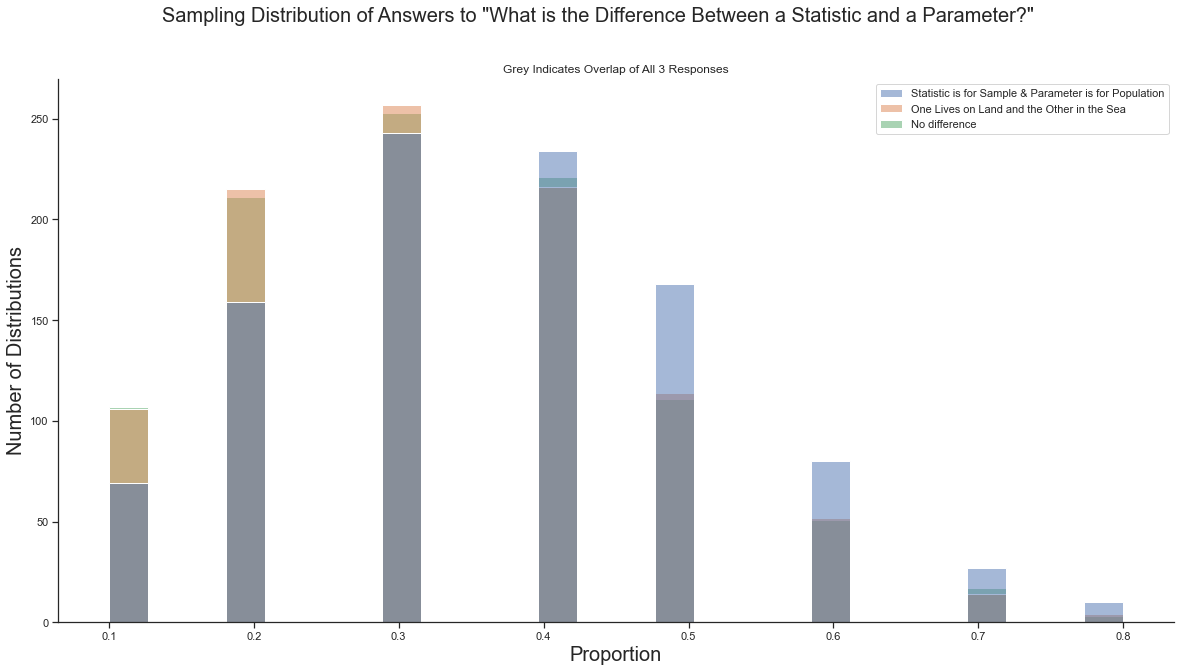

In [36]:
# plot using seaborn histograms
# documentation: https://seaborn.pydata.org/examples/histogram_stacked.html

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    sampdist

)
plt.xlabel(xlabel="Proportion", fontsize=20)
plt.ylabel(ylabel="Number of Distributions", fontsize=20)
plt.suptitle("Sampling Distribution of Answers to \"What is the Difference Between a Statistic and a Parameter?\"", fontsize=20)
plt.title(label="Grey Indicates Overlap of All 3 Responses")


plt.show()
